In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Loading handwritten dataset from keras

In [3]:
(X_train,y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

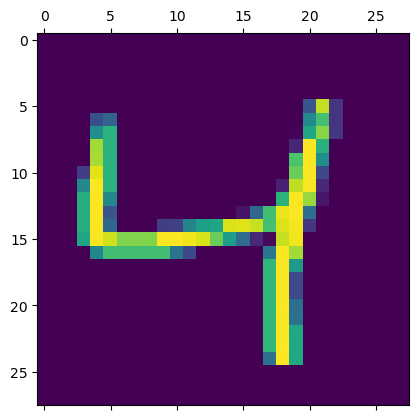

In [8]:
plt.matshow(X_train[2])

In [9]:
y_train[2]

4

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

### Flatten the training dataset

In [11]:
X_train.shape

(60000, 28, 28)

### Scaling the dataset for improving accuracy

In [12]:
X_train = X_train / 255
X_test = X_test / 255

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
X_test_flattened.shape

(10000, 784)

### Simple Neural Network

#### For train data

In [18]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)



Epoch 1/5


1875/1875 [==============================] - 5s 2ms/step - loss: 0.4729 - accuracy: 0.8760
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3043 - accuracy: 0.9143
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2838 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2740 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2664 - accuracy: 0.9259


#### We need the result for test data

In [19]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2653 - accuracy: 0.9263


[0.26534420251846313, 0.9262999892234802]

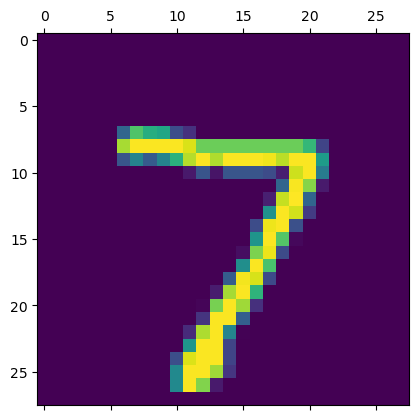

In [20]:
plt.matshow(X_test[0])

In [21]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [22]:
y_predicted[0]

array([2.0012951e-02, 2.9599681e-07, 6.3068241e-02, 9.5756716e-01,
       2.4593908e-03, 1.2966909e-01, 2.9898897e-06, 9.9984574e-01,
       9.8897621e-02, 6.8176639e-01], dtype=float32)

#### This function will get the result

In [23]:
np.argmax(y_predicted[0])

7

In [24]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [25]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 954,    0,    2,    2,    0,    7,    9,    2,    3,    1],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   3,   10,  923,   16,    8,    6,   13,   11,   38,    4],
       [   1,    0,   17,  921,    0,   26,    3,   13,   23,    6],
       [   1,    1,    4,    1,  909,    0,   12,    6,   10,   38],
       [   6,    2,    2,   27,    8,  788,   16,    6,   31,    6],
       [   9,    3,    5,    1,    7,   14,  915,    2,    2,    0],
       [   1,    5,   23,    2,    5,    0,    0,  966,    4,   22],
       [   5,    9,    6,   20,    9,   30,    9,   13,  867,    6],
       [   8,    7,    2,   10,   26,    8,    0,   35,    6,  907]])>

Text(95.72222222222221, 0.5, 'Truth')

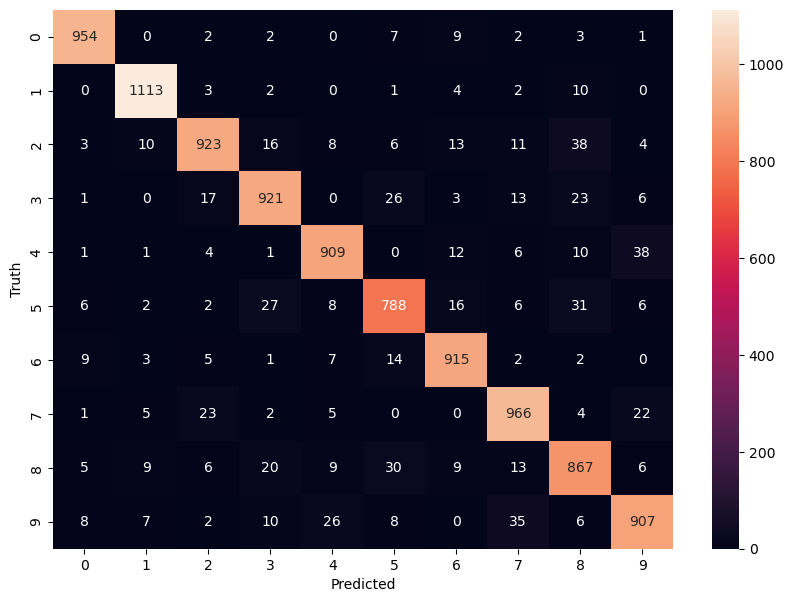

In [26]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Neural Network with hidden layer

In [1]:
model = keras.Sequential([
    #added one hidden layer
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs1/adam',histogram_freq=1)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5,callbacks=[tb_callback])

NameError: name 'keras' is not defined

In [28]:
model = keras.Sequential([
    #added one hidden layer
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/SGD',histogram_freq=1)
model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5,callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6653 - accuracy: 0.8341
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3369 - accuracy: 0.9063
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2880 - accuracy: 0.9201
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2587 - accuracy: 0.9281
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2363 - accuracy: 0.9344


In [48]:
%tensorboard --logdir logs


Reusing TensorBoard on port 6012 (pid 10084), started 3 days, 20:30:18 ago. (Use '!kill 10084' to kill it.)

In [56]:
%tensorboard --logdir logs  --host localhost

#### The accuracy imroved when adding hidden layer

In [32]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2202 - accuracy: 0.9388


[0.22024005651474, 0.9387999773025513]

In [33]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

313/313 [==============================] - 1s 2ms/step


In [34]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    3,    2,    0,    4,    4,    1,    2,    0],
       [   0, 1113,    3,    2,    0,    2,    3,    2,   10,    0],
       [  10,    3,  949,   10,    9,    1,   13,   16,   18,    3],
       [   2,    0,   19,  934,    0,   24,    1,   12,   10,    8],
       [   1,    1,    5,    0,  923,    0,   12,    2,    6,   32],
       [  11,    2,    1,   25,    4,  810,   11,    4,   16,    8],
       [  13,    3,    4,    0,    9,   12,  913,    1,    3,    0],
       [   2,    9,   22,    4,    4,    1,    0,  965,    3,   18],
       [   7,    4,    5,   14,    7,   16,   11,   10,  893,    7],
       [  10,    6,    1,   10,   25,    7,    1,   17,    8,  924]])>

Text(95.72222222222221, 0.5, 'Truth')

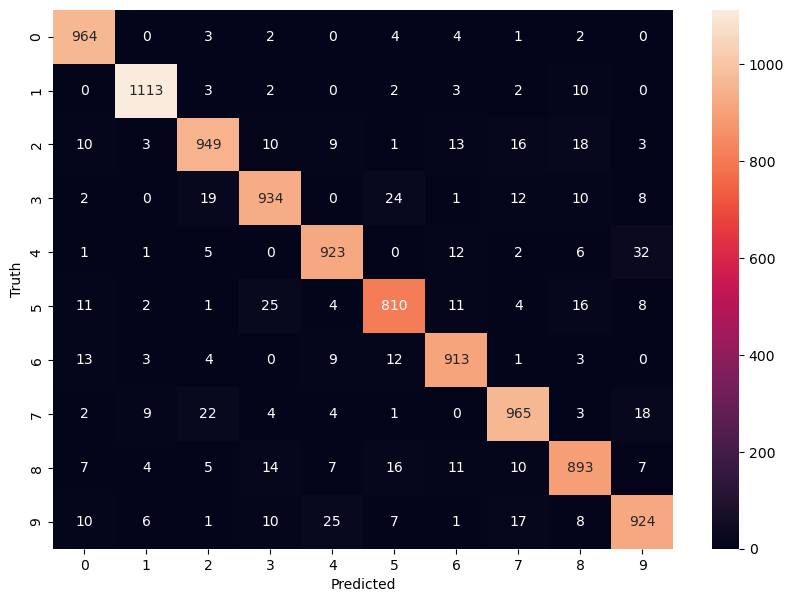

In [35]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Flatten using keras API

In [36]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    #added one hidden layer
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2783 - accuracy: 0.9203
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1259 - accuracy: 0.9625
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0883 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0670 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0523 - accuracy: 0.9840


### Some trials

In [37]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    #added two hidden layers
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(100,activation='hard_sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='Nadam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3149 - accuracy: 0.9136
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1225 - accuracy: 0.9631
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0830 - accuracy: 0.9749
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0628 - accuracy: 0.9805
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0463 - accuracy: 0.9855
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0378 - accuracy: 0.9885
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0296 - accuracy: 0.9910
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0246 - accuracy: 0.9925
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0198 - accuracy: 0.9943
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.017

In [38]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0772 - accuracy: 0.9779


[0.07719733566045761, 0.9779000282287598]